### Visualising data 

We are working on helping NGO project Lecturers without borders [2] to visualise and to estimate their impact.
One possibility is to visualise airtable data we have online in the form 


<img src="slack_airtable.png" alt="Drawing" style="width: 200px;"/>

which we would like to convert to the map form 

<img src="map.png" alt="Drawing" style="width: 200px;"/>

### Reading datafiles 

We take as an example several data files:
1. LeWiBo data of lectures made from airtable (open data from google for schools)
2. LeWiBo geolocation data from www.scied.network airtable on a map
3. Registered participants to LeWiBo (depersonalised data)


In [1]:
from dbfread import DBF
import geopandas as gpd
import pandas as pd
import csv
import matplotlib.pyplot as plt


###########OPEN data FILE###################


#opening and printing data from dbf file 
print('reading schools from airtable of LeWiBo')        


My_file_path_name = 'C:/Users/lyubo/Documents/DATA_networks/lecturers_without_borders/Lectures-Grid.csv'


with open(My_file_path_name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        #G.add_node(row[0])#add edge to the graph #print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
        line_count += 1
        # count in which country the lecture was made
    print(f'Processed {line_count} lines.')

    
#Table = gpd.read_file(My_file_path_name)

print('turning csv file to pandas')
df_lectures=  pd.read_csv(My_file_path_name, header=None, dtype=str)

# reading columns of file 
#df_lectures.columns = ["Date of lecture", "Place of lecture", "Address of school", "Topic of the lecture", "People giving lecture", "ReceivingCountry", "MobilityType", "SpecialNeeds", "SubjectAreaCode", "SubjectAreaName", "CombinedMobilityYesNo", "StartDate", "EndDate", "DurationInMonths", "DurationInDays","SubsistenseTravel", "LevelOfStudy","ParticipantID","ParticipantGender","ParticipantType","Language", "SendingPartnerErasmusID","SendingPArtnerName", "HostingPartnerErasmusID", "HostingPartnerName","HostingPartnerCountry","HostingPartnerCity"]
# Read in the airlines data.airlines = pandas.read_csv("airlines.csv", header=None, dtype=str)


df_lectures.head()

#access Place of lecture column 
df_lectures[[1]]


reading schools from airtable of LeWiBo
Processed 74 lines.
turning csv file to pandas


,1
0,Place of lecture
1,"Kathmandu,Nepal"
2,"Kathmandu,Nepal"
3,"Kathmandu,Nepal"
4,"Kathmandu,Nepal"
5,"Moscow,Russia"
6,"Balapanlar Russia,Russia"
7,"Munich,Germany"
8,"Munich,Germany"
9,"Lyon region,France"


### Data analysis 
We can use some basic mapping visualisation of the data from Lecturers without borders. We start with typeform registered participants to LeWiBo (depersonalised data).

### Plotting on a map

Now using suggestions for plotting on a map we plot number of people for each country on a map using some hints from
http://ramiro.org/notebook/basemap-choropleth/

As they suggest to map data values to colors we can take advantage of Matplotlib's colormap API: a color scheme of 9 different saturations of green from light to dark, map the values from CSV file to the 9 color bins, and add a bin column to the DataFrame that can later be used to set the color value.


In [63]:
from dbfread import DBF
import geopandas as gpd
import pandas as pd
import csv
import matplotlib.pyplot as plt


###########OPEN data FILE###################

#opening and printing data from dbf file 
print('reading scientists database from LeWiBo depersonalised forms')        


My_file_path_name = 'C:/Users/lyubo/Documents/DATA_networks/lecturers_without_borders/lecturers_base_depersonalised_july2019.csv'


with open(My_file_path_name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        #G.add_node(row[0])#add edge to the graph #print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}.')
        line_count += 1
        # count in which country the lecture was made
    print(f'Processed {line_count} lines.')

    
#Table = gpd.read_file(My_file_path_name)

print('turning csv file to pandas')
df_scientists=  pd.read_csv(My_file_path_name, header=None, dtype=str)

# reading columns of file 
#df_scientists.columns = ["Date of lecture", "Place of lecture", "Address of school", "Topic of the lecture", "People giving lecture", "ReceivingCountry", "MobilityType", "SpecialNeeds", "SubjectAreaCode", "SubjectAreaName", "CombinedMobilityYesNo", "StartDate", "EndDate", "DurationInMonths", "DurationInDays","SubsistenseTravel", "LevelOfStudy","ParticipantID","ParticipantGender","ParticipantType","Language", "SendingPartnerErasmusID","SendingPArtnerName", "HostingPartnerErasmusID", "HostingPartnerName","HostingPartnerCountry","HostingPartnerCity"]
# Read in the airlines data.airlines = pandas.read_csv("airlines.csv", header=None, dtype=str)



df_scientists.head()
#df_scientists.columns
#df_scientists = df_scientists.rename(columns={'5': 'Countries'})


reading scientists database from LeWiBo depersonalised forms
Processed 93 lines.
turning csv file to pandas


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,#,Names,What is your profession? If you are a scientis...,Would you like to participate in Lecturers wit...,Languages,Countries,"What is your email?(we will not spam you, just...",Would you like to receive news about events fr...,Have you participated in any outreach programs...,How did you learn about Lecturers without bord...,"By clicking ""Submit"" you agree to submit your ...",Start Date (UTC),Submit Date (UTC),Network ID
1,52d3c0acf8ae8af69281d7c1bb612baa,Sapna Sinha,Student of Science,"Yes, I would like to participate as a lecturer.",English,"Germany , India",sinha.sapna7@gmail.com,1,no,Data Science for good,submit,2019-07-26 11:47:33,2019-07-26 11:49:09,2e127fe67f
2,cadd49dda90e0625ef4c458e88e9848d,Valerio Lembo,I am a postdoc researcher in climate science a...,"Yes, I would like to participate as a lecturer.","English, Italian, a bit of German","Italy, UK, France, Austria",lembo.valerio@gmail.com,1,Not officially,"Through Valerio Lucarini, but it seems I have ...",NaN,2019-07-04 18:02:17,2019-07-04 18:04:54,c38e5a5ef4
3,9fdfde10ae1f9c4333a2f2ae5619332b,Clara Burgard,I am currently a PostDoc scientist in climate ...,"Yes, I would like to participate as a lecturer.","French, German, English, ok Spanish","France, Germany, Western Europe generally",clara.burgard@mpimet.mpg.de,1,EGU Cryosphere Blog (outreach for other scient...,Facebook and a former colleague: Beniamino Abis,submit,2019-07-03 11:40:23,2019-07-03 11:43:28,5bd269aa42
4,a6a317a771b6467e74cb5a6f093d2d31,Leonard Borchert,Scientist in Climate Research,"Yes, I would like to participate as a lecturer.","German, English","Germany, France, UK",Leonardborchert@gmail.com,1,Uni Hamburg Night of Science; Freelance Museum...,I learned about the program from Beniamino Abi...,NaN,2019-07-03 06:44:22,2019-07-03 06:48:25,a9b79e1c2a


### Preparing data

First we prepare data to be in a special format with no multiple entries in each cell for countries.

As they suggest to map data values to colors we can take advantage of Matplotlib's colormap API: a color scheme of 9 different saturations of green from light to dark, map the values from CSV file to the 9 color bins, and add a bin column to the DataFrame that can later be used to set the color value.



  

In [68]:
#set names of columns as we want them
df_scientists.columns = ['Index', 'Name','Position','Participate','Language','Country','Email', 'News','Outreach','Known','Agree','Time', 'Time2','Code']

country_list = df_scientists.Country.values.tolist()
print('first dataset')
print(country_list)

# clean country list from nans, this modifies current dataframe df_scientists !!!
new_df = df_scientists.dropna(how='any', inplace=True)#(subset=['Country'])
#new_df.columns = ['Index', 'Name','Position','Participate','Language','Country','Email', 'News','Outreach','Known','Agree','Time', 'Time2','Code']

df_scientists.head()

# put all countries to one list
#country_list = new_df.Country.values.tolist()
print('second dataset')
print(country_list)


# We start with creating a new dataframe with no duplicates for Country row from the series with Name as the index
new_df = pd.DataFrame(df_scientists.Country.str.split(',').tolist()).stack()
print(new_df)



first dataset
['Countries', 'Germany , India', 'France, Germany, Western Europe generally', 'France, Russia, Germany', 'Indonesia, Bali', 'Brazil, Finland, Spain, Belgium, India, etc', 'Japan, France, various European countries, the US', 'Italy, Switzerland, the USA', 'India', 'UK, Russia, Estonia, France']
second dataset
['Countries', 'Germany , India', 'France, Germany, Western Europe generally', 'France, Russia, Germany', 'Indonesia, Bali', 'Brazil, Finland, Spain, Belgium, India, etc', 'Japan, France, various European countries, the US', 'Italy, Switzerland, the USA', 'India', 'UK, Russia, Estonia, France']
0  0                      Countries
1  0                       Germany 
   1                          India
2  0                         France
   1                        Germany
   2       Western Europe generally
3  0                         France
   1                         Russia
   2                        Germany
4  0                      Indonesia
   1                 

In [43]:
# Import the data
df = pd.DataFrame({
   'EmployeeId': ['001', '002', '003', '004', '005'],
   'City': ['Mumbai|Bangalore', 'Pune|Mumbai|Delhi', 'Mumbai|Bangalore', 'Mumbai|Pune', 'Bangalore'] 
})# Step 1
# We start with creating a new dataframe from the series with EmployeeId as the index
new_df = pd.DataFrame(df.City.str.split('|').tolist(), index=df.EmployeeId).stack()

print(new_df)
# Step 2
# We now want to get rid of the secondary index
# To do this, we will make EmployeeId as a column (it can't be an index since the values will be duplicate)
new_df = new_df.reset_index([0, 'EmployeeId'])# Step 3
# The final step is to set the column names as we want them
new_df.columns = ['EmployeeId', 'City']
print(new_df)


# leave only those countries which are on the list
countries.txt

EmployeeId   
001         0       Mumbai
            1    Bangalore
002         0         Pune
            1       Mumbai
            2        Delhi
003         0       Mumbai
            1    Bangalore
004         0       Mumbai
            1         Pune
005         0    Bangalore
dtype: object
  EmployeeId       City
0        001     Mumbai
1        001  Bangalore
2        002       Pune
3        002     Mumbai
4        002      Delhi
5        003     Mumbai
6        003  Bangalore
7        004     Mumbai
8        004       Pune
9        005  Bangalore


In [32]:
# we prepare the data to be plotted on a map 
# we use the following function for this

import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap


#df_scientists.set_index([5], inplace=True)
#df_scientists = df_scientists.ix[iso3_codes].dropna() # Filter out non-countries and missing values.


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

def plotCountryPatch( axes, country_name, fcolor ):
    # plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))


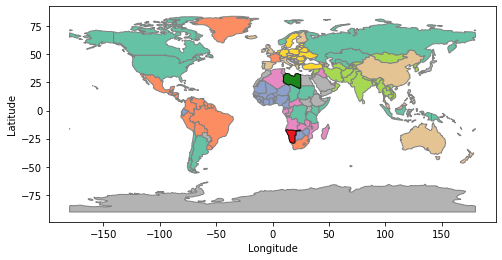

In [17]:

# plot the whole world
ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

# or plot Africa continent
#ax2 = world[world.continent == 'Africa'].plot(figsize=(8,8), edgecolor=u'gray', cmap='Pastel1')

# then plot some countries on top
plotCountryPatch(ax2, 'Namibia', 'red')
plotCountryPatch(ax2, 'Libya', 'green')

# the place to plot additional vector data (points, lines)

plt.ylabel('Latitude')
plt.xlabel('Longitude')

#ax2.axis('scaled')
plt.show()

In [ ]:
# for creation of data bins

values = df[year]
cm = plt.get_cmap('Greens')
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
df['bin'] = np.digitize(values, bins) - 1
df.sort_values('bin', ascending=False).head(10)

In [4]:
#rename columns of dataframe


#let us read the countries of dataframe 

column_country = "What are the most popular countries you visit?"
df_scientists.column_country.iloc[0]


# analysis of the particular entrence 
df_scientists.iloc[4]


0                      a6a317a771b6467e74cb5a6f093d2d31
1                                      Leonard Borchert
2                         Scientist in Climate Research
3       Yes, I would like to participate as a lecturer.
4                                       German, English
5                                   Germany, France, UK
6                             Leonardborchert@gmail.com
7                                                     1
8     Uni Hamburg Night of Science; Freelance Museum...
9     I learned about the program from Beniamino Abi...
10                                                  NaN
11                                  2019-07-03 06:44:22
12                                  2019-07-03 06:48:25
13                                           a9b79e1c2a
Name: 4, dtype: object

C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


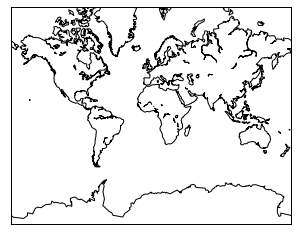

In [5]:
# Now let us plot data on a maps
# First we define x as countries 

#name_lengths = airlines["name"].apply(lambda x: len(str(x)))
#plt.scatter(airlines["id"].astype(int), name_lengths)

#data = pandas.DataFrame({"lengths": name_lengths, "ids": airlines["id"].astype(int)})
#seaborn.jointplot(x="ids", y="lengths", data=data)



# using latitude and longitude pairs for airports. The first map we can make is one that shows all the airports all over the world. We can do this with the basemap extension to matplotlib. This enables drawing world maps and adding points, and is very customizable.

# Import the basemap package
from mpl_toolkits.basemap import Basemap

# Create a map on which to draw. 
# Use mercator projection, and showing the whole world.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# Draw coastlines, and the edges of the map.


m.drawcoastlines()
m.drawmapboundary()
# Convert latitude and longitude to x and y coordinates
x, y = m(list(airports["longitude"].astype(float)), list(airports["latitude"].astype(float)))

# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')
# Show the plot.


plt.show()

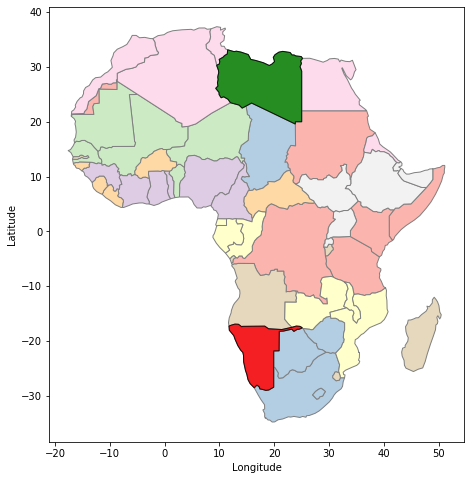

Work in progress